In [1]:
# Importing required libraries
import numpy as np
import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_invoice = pd.ExcelFile('C:\\Users\\Jyotishman Parasar\\DataanalysisChallenge\\invoice_ext.xlsx')

In [3]:
df3 = data_invoice.parse('Sheet1')

In [4]:
df3

,Unnamed: 0,V1,INVOICING_ID,INV_CREATED_DATE,INVOICE_STATUS,GR_DATE,IR_DATE,BID_UNIT,BID_UNIT_SHORT_DESCRIPTION,UNIT,...,CONSTRUCTION_TYPE_GRP,INVOICE_TYPE,INVOICE_DATE,SEG_STATUS,NETWORKTYPE,SHAPE_MILES,TYPE_NAME,NUMBEROFFIBERS,MARKET_ID,fqn_id
0,3,3,161397,2019-02-18 17:59:53,AP_PAID,2019-02-20,2019-02-28,E-400.1,Permits in Hand - LLD Aerial,foot,...,Aerial,LLD,2019-01-09,NaN,NaN,NaN,NaN,NaN,67,195657.0
1,17,17,875084,2020-05-21 10:14:24,AP_PAID,2020-06-15,2020-06-15,E-300.2,Cable Placed - New UG,foot,...,Buried,LLD,2020-05-20,Spliced and Tested,BackHaul,0.034234,BURIED,864.0,69,145342.0
2,20,20,478599,2019-11-18 09:11:02,AP_PAID,2019-11-25,2019-11-25,E-200.1,Permits in Hand - PM,foot,...,Project Management,LLD,2019-11-18,Cable Placed,FrontHaul,0.580373,BURIED,288.0,69,259382.0
3,50,50,322744,2019-08-06 14:56:30,VENDOR_CANCELLED,NaT,NaT,E-200.2,Construction Complete - PM,foot,...,Project Management,As-Built,2019-08-06,Spliced and Tested,FrontHaul,0.037251,BURIED,144.0,69,74587.0
4,57,57,214540,2019-05-09 00:32:57,AP_PAID,2018-11-06,2018-11-09,E-400.2,Cable Placed - Aerial,foot,...,Aerial,LLD,2018-10-22,NaN,NaN,NaN,NaN,NaN,69,115642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58299,811645,811645,119895,2018-09-05 13:14:25,AP_PAID,2018-10-02,2018-10-08,C-510,Cable Prep/Splice/Test (Ribbon),fiber,...,NaN,LLD,2018-09-04,Spliced and Tested,FrontHaul,0.063777,AERIAL,8.0,67,290521.0
58300,811659,811659,952579,2020-06-12 13:03:04,VENDOR_SAVED,NaT,NaT,C-100.1B,Cable Placed - New UG (B/T/P) (Inv'd w/Conduit...,foot,...,Buried,LLD,2020-06-12,Cable Placed,FrontHaul,0.189692,BURIED,864.0,68,167624.0
58301,811668,811668,492454,2019-11-25 19:27:33,AP_PAID,2018-09-10,2018-09-11,C-100.1,Cable Placed - New UG (B/T/P),foot,...,Buried,LLD,2018-04-17,Spliced and Tested,FrontHaul,0.141879,BURIED,288.0,69,114910.0
58302,811672,811672,488173,2019-11-22 17:21:55,AP_PAID,2018-05-03,2018-05-08,E-300.1,Permits in Hand - LLD New UG,foot,...,Buried,LLD,2018-02-27,Spliced and Tested,FrontHaul,0.124837,AERIAL,8.0,67,141574.0


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58304 entries, 0 to 58303
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  58304 non-null  int64         
 1   V1                          58304 non-null  int64         
 2   INVOICING_ID                58304 non-null  int64         
 3   INV_CREATED_DATE            58304 non-null  datetime64[ns]
 4   INVOICE_STATUS              58304 non-null  object        
 5   GR_DATE                     50754 non-null  datetime64[ns]
 6   IR_DATE                     49477 non-null  datetime64[ns]
 7   BID_UNIT                    58304 non-null  object        
 8   BID_UNIT_SHORT_DESCRIPTION  58304 non-null  object        
 9   UNIT                        58304 non-null  object        
 10  QUANTITY                    58304 non-null  float64       
 11  UNIT_RATE                   58304 non-null  float64   

In [6]:
df3['BID_UNIT'] = df3['BID_UNIT'].fillna(value = 'NA')
df3['MARKET_ID'] = df3['MARKET_ID'].fillna(value = 'NA')

In [7]:
df3['GR_DATE'].min(), df3['GR_DATE'].max()

(Timestamp('2016-09-12 00:00:00'), Timestamp('2020-09-23 00:00:00'))

In [8]:
print(df3['INVOICE_STATUS'].value_counts())

AP_PAID              47928
VENDOR_CANCELLED      5142
IR_PROCESSED          2891
ENGINEER_APPROVED      552
ENGG_MGR_APPROVED      495
ENGINEER_REJECTED      380
VENDOR_SAVED           337
VENDOR_SUBMITTED       260
IR_SENT                219
GR_FAILED               75
VENDOR_REJECTED         25
Name: INVOICE_STATUS, dtype: int64


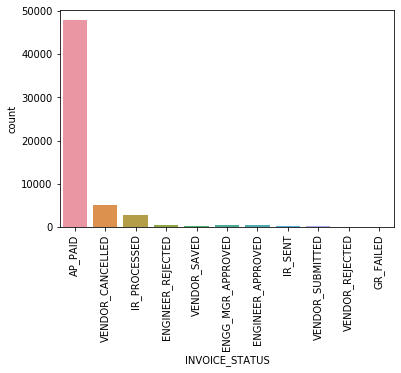

In [9]:
plt.xticks(rotation=90)
sns.countplot(x= 'INVOICE_STATUS', data = df3)

In [10]:
print(df3['MARKET_ID'].value_counts())

69    50653
68     4027
67     3624
Name: MARKET_ID, dtype: int64


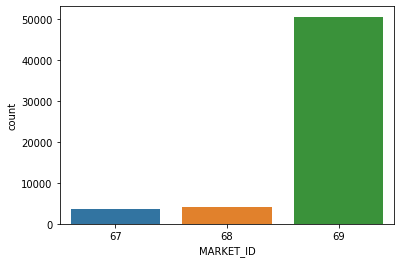

In [11]:
## Overall performance of each market (Nationally)

sns.countplot(x= 'MARKET_ID', data = df3)

In [12]:
print(df3['CONSTRUCTION_TYPE_GRP'].value_counts())

Buried                28810
Project Management    11204
Aerial                 8742
Name: CONSTRUCTION_TYPE_GRP, dtype: int64


In [13]:
print(df3['INVOICE_TYPE'].value_counts())

LLD               51803
Pass Thru          5512
As-Built            593
ODN Design           43
Fiber Splicing       28
Change Order         21
HLD                  10
Name: INVOICE_TYPE, dtype: int64


In [14]:
print(df3['SEG_STATUS'].value_counts())

Spliced and Tested       28434
Cable Placed             17556
Construction Underway     1407
In Design                  675
Permits Received           399
Permits Submitted           99
Name: SEG_STATUS, dtype: int64


In [15]:
print(df3['NETWORKTYPE'].value_counts())

FrontHaul               27524
BackHaul                 9654
Distribution             8418
FrontHaul & BackHaul      271
0                          30
All                         4
Name: NETWORKTYPE, dtype: int64


In [16]:
print(df3['TYPE_NAME'].value_counts())

BURIED    27139
AERIAL     9754
FDT          61
Name: TYPE_NAME, dtype: int64


In [17]:
## Total labor amount nationally

df3['LABOR_AMOUNT'] = df3['LABOR_AMOUNT'].fillna(0)

Tot_Labour_Cost = df3['LABOR_AMOUNT'].sum()
print(Tot_Labour_Cost)

176624451.9824


In [18]:
print(df3['CONSTRUCTION_TYPE'].value_counts())

New UG Softscape      14406
New UG Shared         11215
Project Management    11204
Aerial                 8742
Existing UG            2619
4-Cable Placed         2265
5-Splice & Test         922
Permitting              913
Fiber Splicing          659
New UG Hardscape        563
ODN Equipment           212
ODN Design              176
3-Conduit Placed        107
Other                    99
Make Ready               35
HLD                      22
Change Order             20
New UG Microtrench        7
Name: CONSTRUCTION_TYPE, dtype: int64


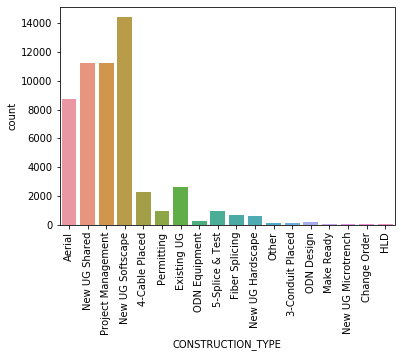

In [19]:
plt.xticks(rotation=90)
sns.countplot(x= 'CONSTRUCTION_TYPE', data = df3)

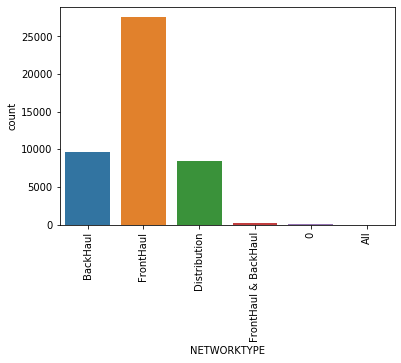

In [20]:
plt.xticks(rotation=90)
sns.countplot(x= 'NETWORKTYPE', data = df3)